<a href="https://colab.research.google.com/github/Sheetal201/Sales-Prediction/blob/main/SalesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries...
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
%matplotlib inline

In [ ]:
# data = pd.read_csv('/content/drive/MyDrive/Datasets/train.csv')
data = pd.read_csv("/content/drive/MyDrive/Datasets/train.csv")

In [ ]:
# Imported dataset from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
data[data['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [ ]:
data = data.dropna()

In [ ]:
data.shape

(9789, 18)

In [ ]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [ ]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [ ]:
# Function to encode dates by day, month and year in the dataset
def encode_dates(df, column):
    df = df.copy()
    df[column] = pd.to_datetime(df[column])
    df[column + '_year'] = df[column].apply(lambda x: x.year)
    df[column + '_month'] = df[column].apply(lambda x: x.month)
    df[column + '_day'] = df[column].apply(lambda x: x.day)
    df = df.drop(column, axis=1)
    return df

In [ ]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop unnecessary columns
    df = df.drop(['Row ID', 'Customer Name', 'Country', 'Product Name', 'City', 'State', 'Region'], axis=1)
    
    # Drop customer-specific feature columns
    df = df.drop(['Order ID', 'Customer ID'], axis=1)
    
    # Extract date features
    df = encode_dates(df, column='Order Date')
    df = encode_dates(df, column='Ship Date')

    return df

In [ ]:
X = preprocess_inputs(data)

In [ ]:
X.head(2)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9789 entries, 0 to 9799
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ship Mode         9789 non-null   object 
 1   Segment           9789 non-null   object 
 2   Postal Code       9789 non-null   float64
 3   Product ID        9789 non-null   object 
 4   Category          9789 non-null   object 
 5   Sub-Category      9789 non-null   object 
 6   Sales             9789 non-null   float64
 7   Order Date_year   9789 non-null   int64  
 8   Order Date_month  9789 non-null   int64  
 9   Order Date_day    9789 non-null   int64  
 10  Ship Date_year    9789 non-null   int64  
 11  Ship Date_month   9789 non-null   int64  
 12  Ship Date_day     9789 non-null   int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 1.0+ MB


Standard Class    5849
Second Class      1901
First Class       1501
Same Day           538
Name: Ship Mode, dtype: int64


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

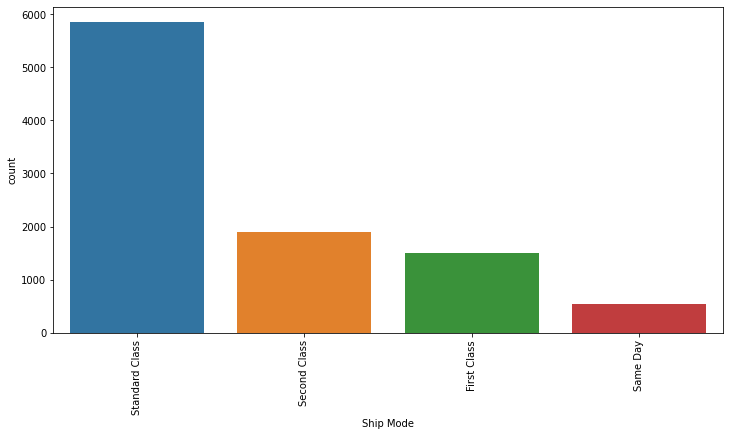

In [ ]:
print (X['Ship Mode'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(x=X['Ship Mode'], order=(X['Ship Mode'].value_counts().head(50)).index)
plt.xticks(rotation=90)

Consumer       5096
Corporate      2948
Home Office    1745
Name: Segment, dtype: int64


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

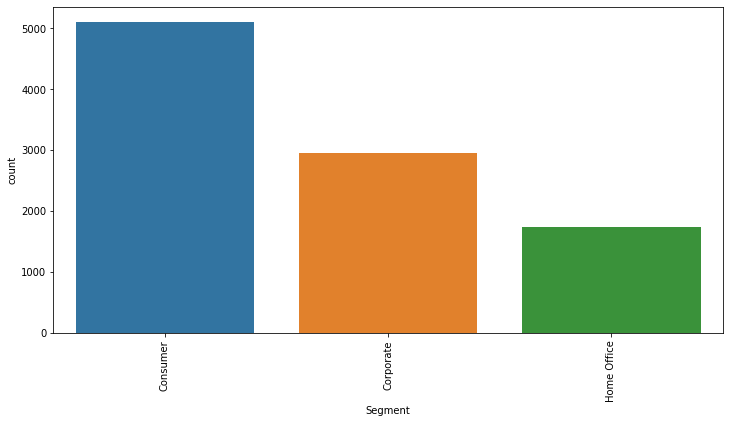

In [ ]:
print (X['Segment'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(x=X['Segment'], order=(X['Segment'].value_counts().head(50)).index)
plt.xticks(rotation=90)

Office Supplies    5903
Furniture          2076
Technology         1810
Name: Category, dtype: int64


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

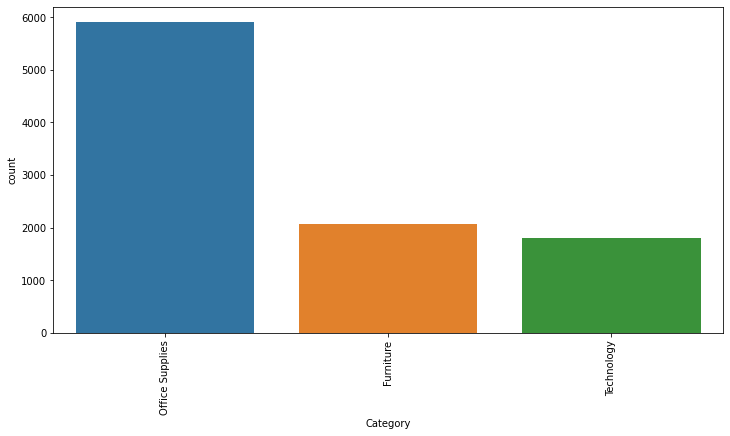

In [ ]:
print (X['Category'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(x=X['Category'], order=(X['Category'].value_counts().head(50)).index)
plt.xticks(rotation=90)

Binders        1492
Paper          1336
Furnishings     931
Phones          875
Storage         831
Art             784
Accessories     754
Chairs          606
Appliances      458
Labels          357
Tables          314
Envelopes       247
Bookcases       225
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: Sub-Category, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

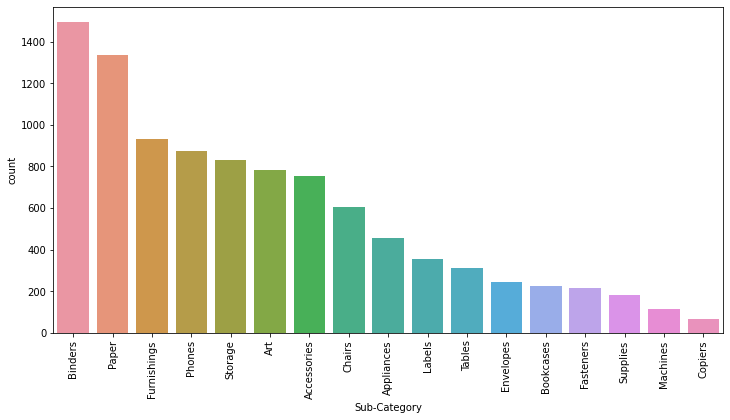

In [ ]:
print (X['Sub-Category'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(x=X['Sub-Category'], order=(X['Sub-Category'].value_counts().head(50)).index)
plt.xticks(rotation=90)

2018    3253
2017    2530
2016    2053
2015    1953
Name: Order Date_year, dtype: int64


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

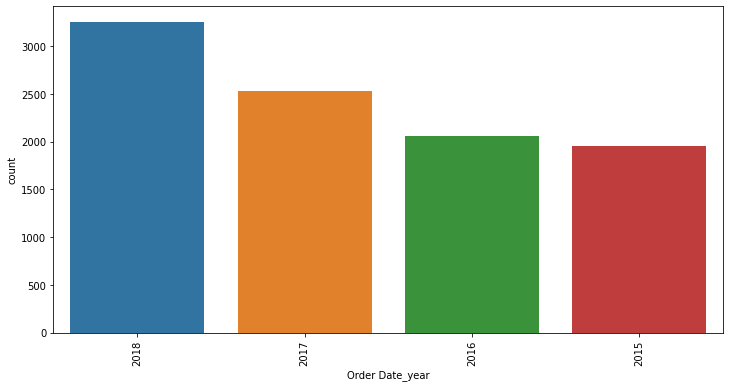

In [ ]:
print (X['Order Date_year'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(x=X['Order Date_year'], order=(X['Order Date_year'].value_counts().head(50)).index)
plt.xticks(rotation=90)

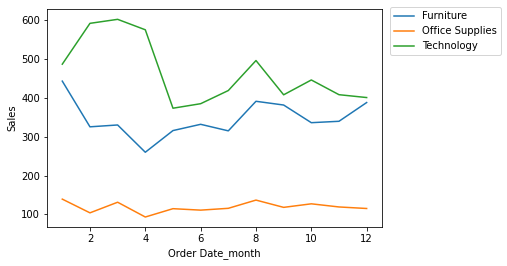

In [ ]:
# Plotting the sales with respect to categories on a monthly scale

sns.lineplot(data=X, x='Order Date_month', y='Sales', hue='Category', ci=None)
plt.legend(bbox_to_anchor=(1.37,0.9), loc='right')

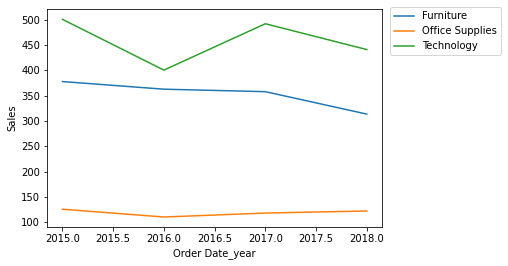

In [ ]:
# Plotting the sales with respect to categories on a yearly scale

sns.lineplot(data=X, x='Order Date_year', y='Sales', hue='Category', ci=None)
plt.legend(bbox_to_anchor=(1.37,0.9), loc='right')

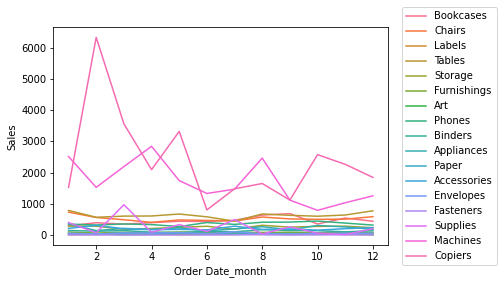

In [ ]:
# Plotting the sales with respect to sub-categories on a monthly scale

sns.lineplot(data=X, x='Order Date_month', y='Sales', hue='Sub-Category', ci=None)
plt.legend(bbox_to_anchor=(1.34,0.5), loc='right')

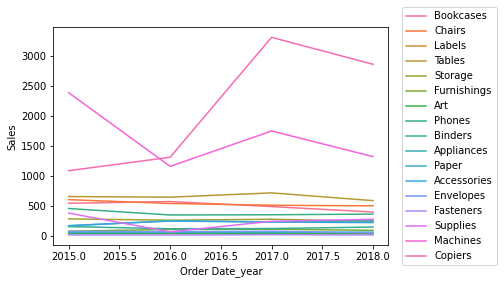

In [ ]:
# Plotting the sales with respect to sub-categories on a yearly scale

sns.lineplot(data=X, x='Order Date_year', y='Sales', hue='Sub-Category', ci=None)
plt.legend(bbox_to_anchor=(1.34,0.5), loc='right')

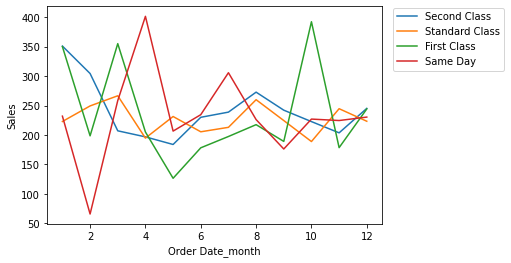

In [ ]:
# Plotting the sales with respect to Ship Mode on a monthly scale

sns.lineplot(data=X, x='Order Date_month', y='Sales', hue='Ship Mode', ci=None)
plt.legend(bbox_to_anchor=(1.38,0.85), loc='right')

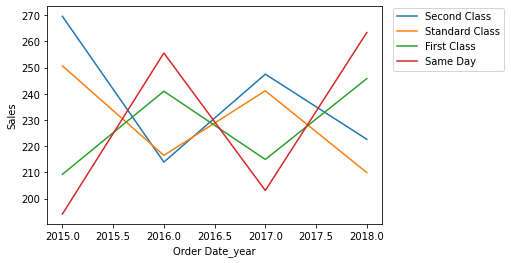

In [ ]:
# Plotting the sales with respect to Ship Mode on a yearly scale

sns.lineplot(data=X, x='Order Date_year', y='Sales', hue='Ship Mode', ci=None)
plt.legend(bbox_to_anchor=(1.38,0.85), loc='right')

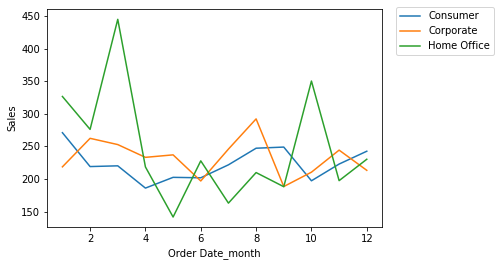

In [ ]:
# Plotting the sales with respect to Segment on a monthly scale

sns.lineplot(data=X, x='Order Date_month', y='Sales', hue='Segment', ci=None)
plt.legend(bbox_to_anchor=(1.35,0.9), loc='right')

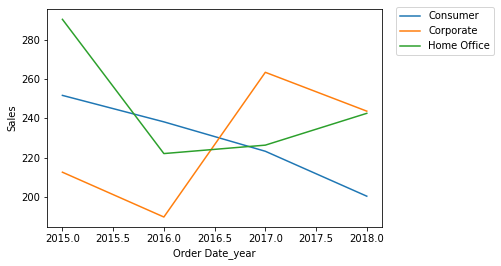

In [ ]:
# Plotting the sales with respect to Segment on a yearly scale

sns.lineplot(data=X, x='Order Date_year', y='Sales', hue='Segment', ci=None)
plt.legend(bbox_to_anchor=(1.35,0.9), loc='right')

In [ ]:
# # Extracting the categorical features in a binary form, from respective columns

X_new = X
category = pd.get_dummies(X_new['Category'])
# ship_mode = pd.get_dummies(X_new['Ship Mode'])
# segment = pd.get_dummies(X_new['Segment'])

In [ ]:
# Concatenating the extracted features into the dataset

X['Furniture'] = category['Furniture'].to_list()
X['Office Supplies'] = category['Office Supplies'].to_list()
X['Technology'] = category['Technology'].to_list()

In [ ]:

# X['First Class'] = ship_mode['First Class'].to_list()
# X['Same Day'] = ship_mode['Same Day'].to_list()
# X['Second Class'] = ship_mode['Second Class'].to_list()
# X['Standard Class'] = ship_mode['Standard Class'].to_list()

In [ ]:
# X['Consumer'] = segment['Consumer'].to_list()
# X['Corporate'] = segment['Corporate'].to_list()
# X['Home Office'] = segment['Home Office'].to_list()

In [ ]:
  le_product_id = LabelEncoder()

In [ ]:
X['Product_id'] = le_product_id.fit_transform(X['Product ID'])

In [ ]:
X.head(2)

,Ship Mode,Segment,Postal Code,Product ID,Category,Sub-Category,Sales,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day,Furniture,Office Supplies,Technology,Product_id
0,Second Class,Consumer,42420.0,FUR-BO-10001798,Furniture,Bookcases,261.96,2017,8,11,2017,11,11,1,0,0,12
1,Second Class,Consumer,42420.0,FUR-CH-10000454,Furniture,Chairs,731.94,2017,8,11,2017,11,11,1,0,0,55


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9789 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ship Mode         9789 non-null   object 
 1   Segment           9789 non-null   object 
 2   Postal Code       9789 non-null   float64
 3   Product ID        9789 non-null   object 
 4   Category          9789 non-null   object 
 5   Sub-Category      9789 non-null   object 
 6   Sales             9789 non-null   float64
 7   Order Date_year   9789 non-null   int64  
 8   Order Date_month  9789 non-null   int64  
 9   Order Date_day    9789 non-null   int64  
 10  Ship Date_year    9789 non-null   int64  
 11  Ship Date_month   9789 non-null   int64  
 12  Ship Date_day     9789 non-null   int64  
 13  Furniture         9789 non-null   int64  
 14  Office Supplies   9789 non-null   int64  
 15  Technology        9789 non-null   int64  
 16  Product_id        9789 non-null   int64  


In [ ]:
# Drop the original columns

X = X.drop(['Ship Mode', 'Category', 'Segment', 'Product ID', 'Sub-Category', 'Order Date_month', 'Order Date_day', 'Ship Date_year', 'Ship Date_month', 'Ship Date_day'], axis=1)

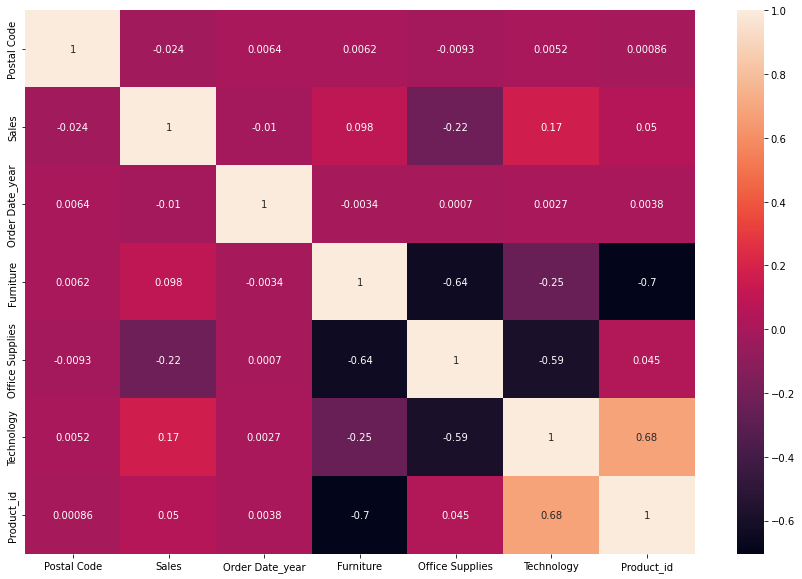

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(X.corr(), annot = True)

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(X, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = X.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X, 0.7)
len(set(corr_features))

1

In [ ]:
corr_features

{'Product_id'}

In [ ]:
X.drop(corr_features,axis=1)

,Postal Code,Sales,Order Date_year,Furniture,Office Supplies,Technology
0,42420.0,261.9600,2017,1,0,0
1,42420.0,731.9400,2017,1,0,0
2,90036.0,14.6200,2017,0,1,0
3,33311.0,957.5775,2016,1,0,0
4,33311.0,22.3680,2016,0,1,0
...,...,...,...,...,...,...
9795,60610.0,3.7980,2017,0,1,0
9796,43615.0,10.3680,2016,0,1,0
9797,43615.0,235.1880,2016,0,0,1
9798,43615.0,26.3760,2016,0,0,1


In [ ]:
# Split the dataset into x and y
y = X['Sales']
x = X.drop('Sales', axis=1)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, shuffle = True, random_state = 1)

In [ ]:
x_train.shape

(6852, 6)

In [ ]:
y_train.head()

847     287.940
5152      2.688
7045      9.248
3895     48.900
4882     59.920
Name: Sales, dtype: float64

In [ ]:
# # Drop the original columns

# x_train = x_train.drop(['Sub-Category'], axis=1)
# x_test = x_test.drop(['Sub-Category'], axis=1)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6852 entries, 847 to 235
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Postal Code      6852 non-null   float64
 1   Order Date_year  6852 non-null   int64  
 2   Furniture        6852 non-null   int64  
 3   Office Supplies  6852 non-null   int64  
 4   Technology       6852 non-null   int64  
 5   Product_id       6852 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 374.7 KB


In [ ]:
# x_train.describe()

In [ ]:
x_train.dtypes
x_train.shape
x_test.shape

(2937, 6)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_1=RandomForestRegressor(n_estimators=10, random_state=0)
model_1.fit(x_train, y_train)
y_pred = model_1.predict(x_test)
accuracy=model_1.score(x_train,y_train)
print('Accuracy of the model:',accuracy)
RF_res = pd.DataFrame({'Actual': y_test, 'Predicted' : y_pred})
RF_res.head(7)

Accuracy of the model: 0.87314272386865


,Actual,Predicted
5497,6.560,19.9700
1740,20.880,9.5964
3000,44.416,320.3442
9532,427.644,659.7321
763,11.360,78.7528
2368,532.704,97.0372
4994,20.320,34.9536


In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 181.19372117256026
Mean Squared Error: 323325.94459908456
Root Mean Squared Error: 568.6175732415281


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor()
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)
accuracy=dt_model.score(x_train,y_train)
print('Accuracy of the model:',accuracy)
DT_res = pd.DataFrame({'Actual': y_test, 'Predicted' : y_pred})
DT_res.head(7)

Accuracy of the model: 0.9970358763898917


,Actual,Predicted
5497,6.560,2.696
1740,20.880,7.830
3000,44.416,88.832
9532,427.644,145.764
763,11.360,39.760
2368,532.704,14.730
4994,20.320,8.128


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 217.16256285325161
Mean Squared Error: 446581.7362697649
Root Mean Squared Error: 668.2677130235793


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model=GradientBoostingRegressor()
gb_model.fit(x_train, y_train)
y_pred = gb_model.predict(x_test)
accuracy=gb_model.score(x_train,y_train)
print('Accuracy of the model:',accuracy)
GB_res = pd.DataFrame({'Actual': y_test, 'Predicted' : y_pred})
GB_res.head(7)

Accuracy of the model: 0.518468423415789


,Actual,Predicted
5497,6.560,77.179414
1740,20.880,66.336378
3000,44.416,102.538815
9532,427.644,567.758620
763,11.360,81.548347
2368,532.704,93.783012
4994,20.320,117.607746


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 196.3785524196799
Mean Squared Error: 266250.179956339
Root Mean Squared Error: 515.9943603919902


In [ ]:
res = pd.DataFrame({'Actual': y_test, 'Predicted' : y_pred})
res

,Actual,Predicted
5497,6.560,77.179414
1740,20.880,66.336378
3000,44.416,102.538815
9532,427.644,567.758620
763,11.360,81.548347
...,...,...
5846,225.568,550.646843
5814,11.672,213.670476
9115,429.600,465.602244
4936,33.740,101.304431
